In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

From the [Riddler Express](https://fivethirtyeight.com/features/who-steals-the-most-in-a-town-full-of-thieves/)...

In [2]:
N = 1000
nSims = 500000

houses = list(range(N))
indices, maxes = [], []

for s in range(nSims):
    
### Money is an integer to start.
    money = [100] * len(houses)

### Start the purge!
    for h in houses:
        
        ### Choose a house to rob that isn't yourself.
        ### np.random.choice can do this in one line but below implementation is over an order of mag faster.
        
        house_to_rob = np.random.randint(0,N-1)
        if house_to_rob >= h:
            house_to_rob += 1
            
        money[h] += int(money[house_to_rob])

        # If a house gets robbed, type becomes a float.
        # This is how I'll identify houses that didn't get robbed.
        money[house_to_rob] = 0.
    
#    types = [ type(i) for i in money ]
    
    maximum = max(money)
    
    maxes.append(maximum)
    indices.append([i for i, x in enumerate(money) if x == maximum])

    if s%5000==0:
        print("Done with simulation", s)

Done with simulation 0
Done with simulation 5000
Done with simulation 10000
Done with simulation 15000
Done with simulation 20000
Done with simulation 25000
Done with simulation 30000
Done with simulation 35000
Done with simulation 40000
Done with simulation 45000
Done with simulation 50000
Done with simulation 55000
Done with simulation 60000
Done with simulation 65000
Done with simulation 70000
Done with simulation 75000
Done with simulation 80000
Done with simulation 85000
Done with simulation 90000
Done with simulation 95000
Done with simulation 100000
Done with simulation 105000
Done with simulation 110000
Done with simulation 115000
Done with simulation 120000
Done with simulation 125000
Done with simulation 130000
Done with simulation 135000
Done with simulation 140000
Done with simulation 145000
Done with simulation 150000
Done with simulation 155000
Done with simulation 160000
Done with simulation 165000
Done with simulation 170000
Done with simulation 175000
Done with simulat

In [3]:
indices_flat = [item for sublist in indices for item in sublist]

In [ ]:
# In many cases, multiple indices tie for high score, so I consider all of them.
#indices_flat = sum(indices,[])

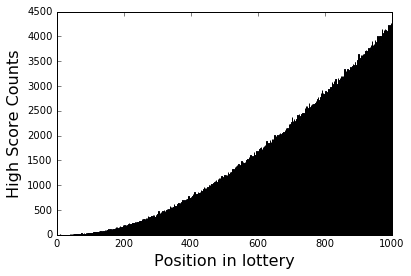

In [6]:
plt.hist(indices_flat, bins=1000)
plt.xlabel("Position in lottery", fontsize=16)
plt.ylabel("High Score Counts", fontsize=16)
plt.show()

In [5]:
max(set(indices_flat), key=indices_flat.count)

998

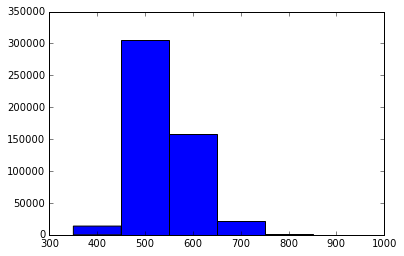

In [7]:
plt.hist(maxes, bins=range(min(maxes)-50,max(maxes)+50,100))
plt.show()

In [8]:
np.median(maxes)

500.0